In [ ]:
!pip install pandas numpy scikit-learn matplotlib tensorflow imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/heart_disease_uci.csv")

In [ ]:
print(data.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [ ]:
data.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [ ]:
# Kategorik verileri dönüştürme (One-Hot Encoding)
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data.head()

id  age  trestbps   chol  thalch  oldpeak   ca  num  sex_Male  \
0   1   63     145.0  233.0   150.0      2.3  0.0    0      True   
1   2   67     160.0  286.0   108.0      1.5  3.0    2      True   
2   3   67     120.0  229.0   129.0      2.6  2.0    1      True   
3   4   37     130.0  250.0   187.0      3.5  0.0    0      True   
4   5   41     130.0  204.0   172.0      1.4  0.0    0     False   

   dataset_Hungary  ...  cp_non-anginal  cp_typical angina  fbs_True  \
0            False  ...           False               True      True   
1            False  ...           False              False     False   
2            False  ...           False              False     False   
3            False  ...            True              False     False   
4            False  ...           False              False     False   

   restecg_normal  restecg_st-t abnormality  exang_True  slope_flat  \
0           False                     False       False       False   
1           False                     False        True        True   
2           False                     False        True        True   
3            True                     False       False       False   
4           False                     False       False       False   

   slope_upsloping  thal_normal  thal_reversable defect  
0            False        False                   False  
1            False         True                   False  
2            False        False                    True  
3            False         True                   False  
4             True         True                   False  

[5 rows x 23 columns]

In [ ]:
print(data.isnull().sum())

id                            0
age                           0
trestbps                     59
chol                         30
thalch                       55
oldpeak                      62
ca                          611
num                           0
sex_Male                      0
dataset_Hungary               0
dataset_Switzerland           0
dataset_VA Long Beach         0
cp_atypical angina            0
cp_non-anginal                0
cp_typical angina             0
fbs_True                      0
restecg_normal                0
restecg_st-t abnormality      0
exang_True                    0
slope_flat                    0
slope_upsloping               0
thal_normal                   0
thal_reversable defect        0
dtype: int64


In [ ]:
# Eksik değerleri kontrol etme ve doldurma (KNNImputer kullanarak)
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data)
data = pd.DataFrame(data_imputed, columns=data.columns)

In [ ]:
# Aykırı değerleri tespit etme ve filtreleme
z_scores = zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

In [ ]:
# Veri setini özellikler (X) ve hedef değişken (y) olarak ayırma
X = data.drop('num', axis=1)
y = data['num']

In [ ]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

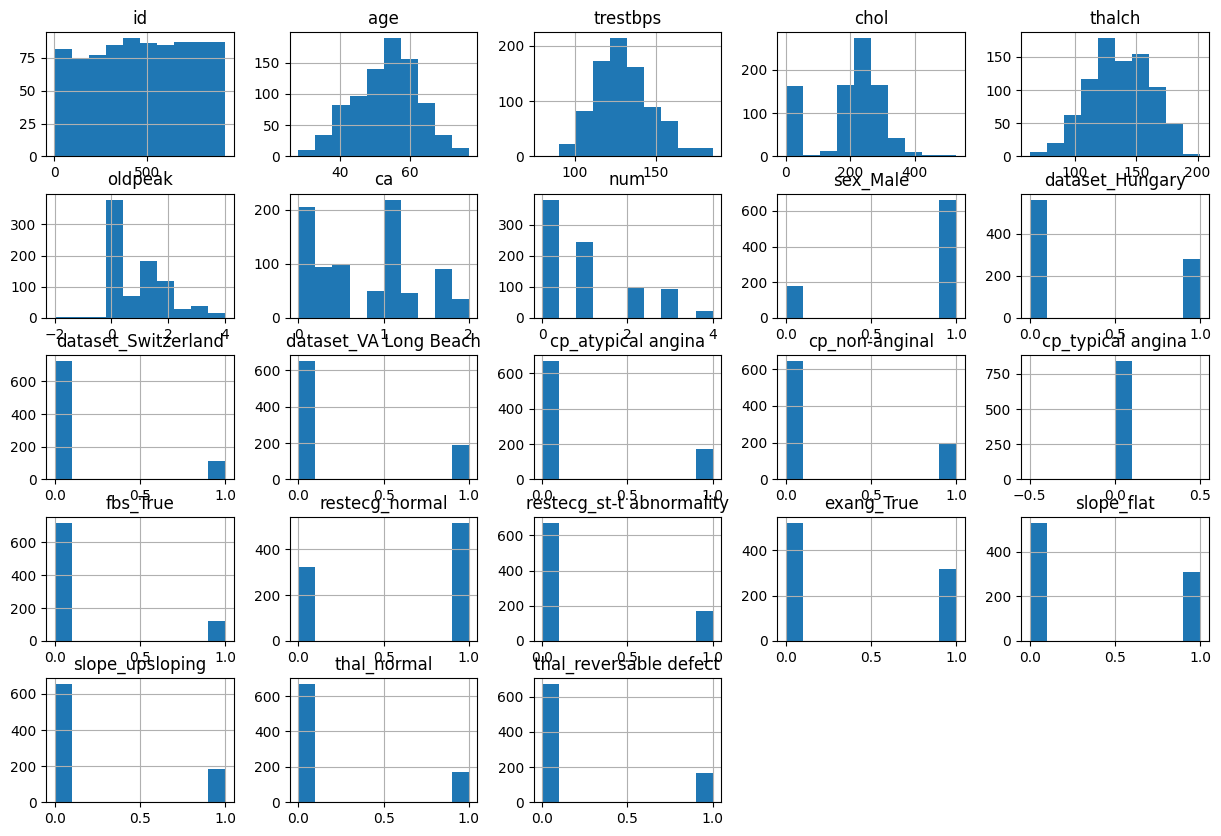

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
data.hist(figsize=(15, 10))
plt.show()

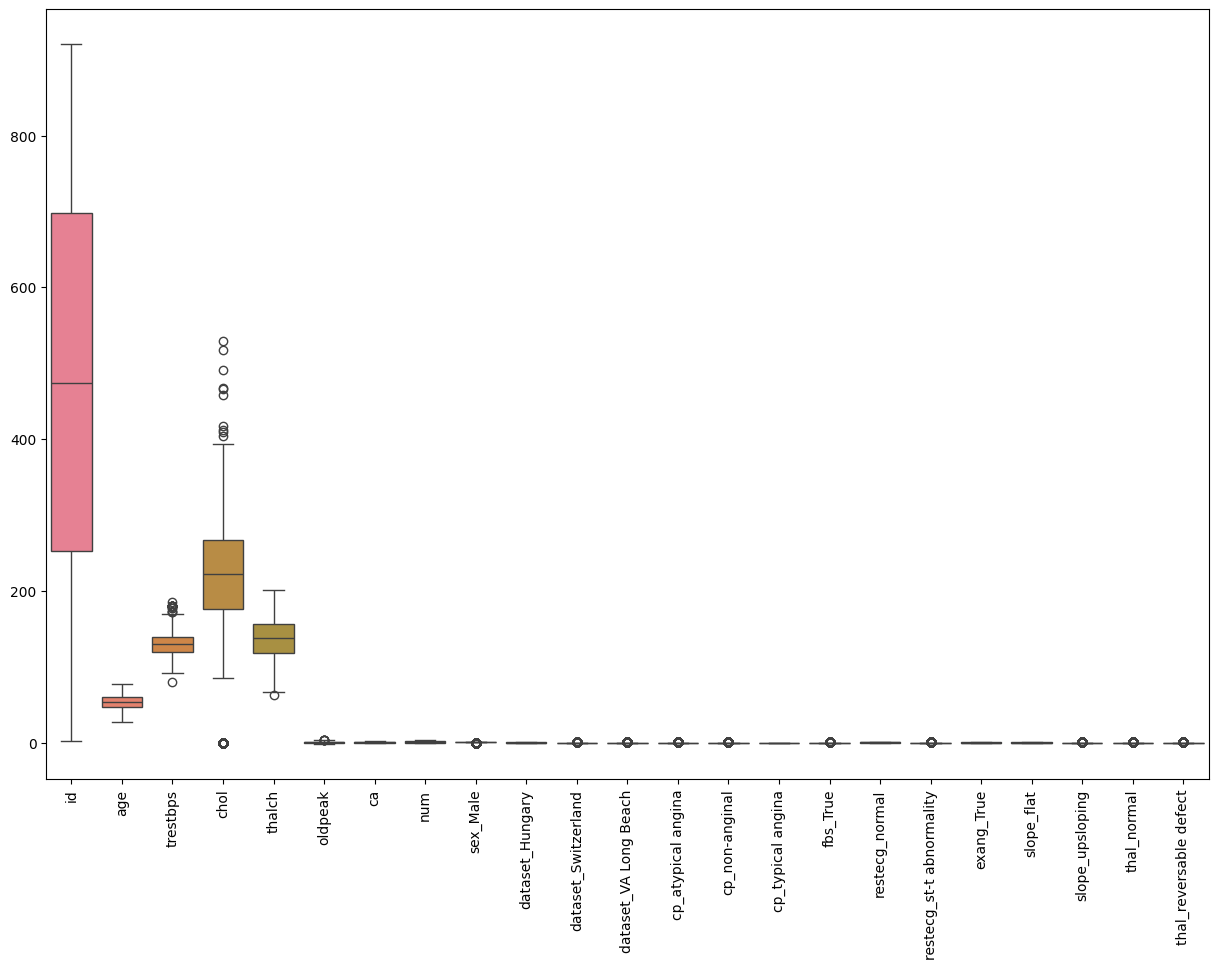

In [ ]:
# Kutu grafikleri
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

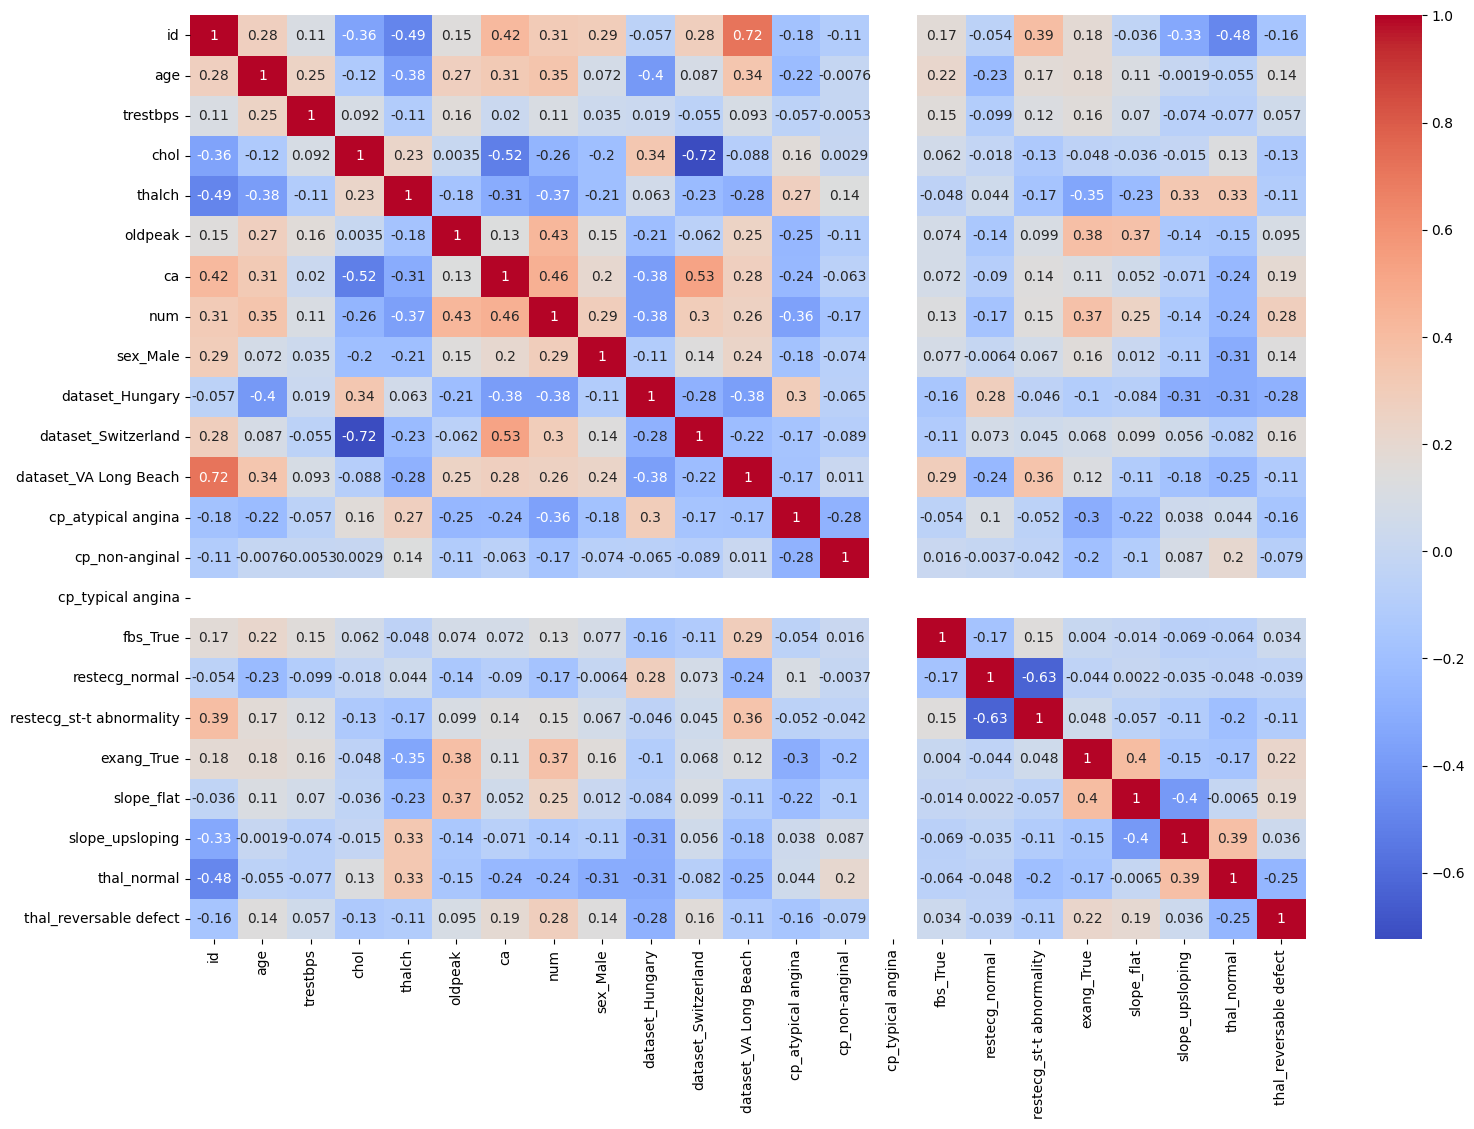

In [ ]:
# Korelasyon matrisi
plt.figure(figsize=(18, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

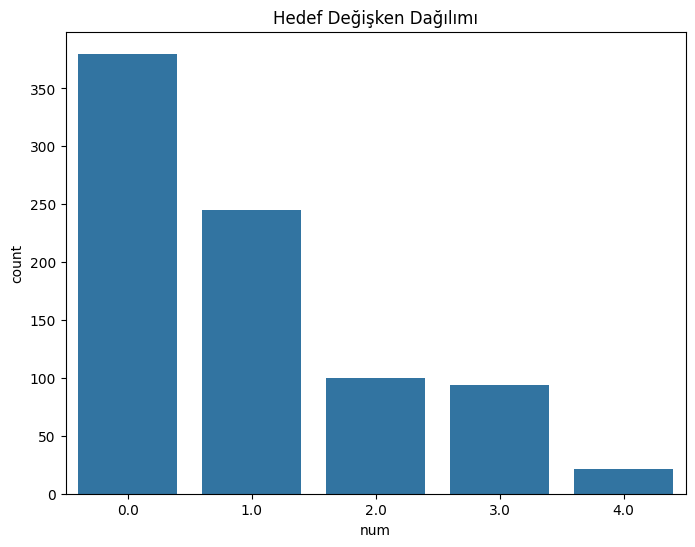

In [ ]:
# Hedef değişkenin dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=data)
plt.title('Hedef Değişken Dağılımı')
plt.show()

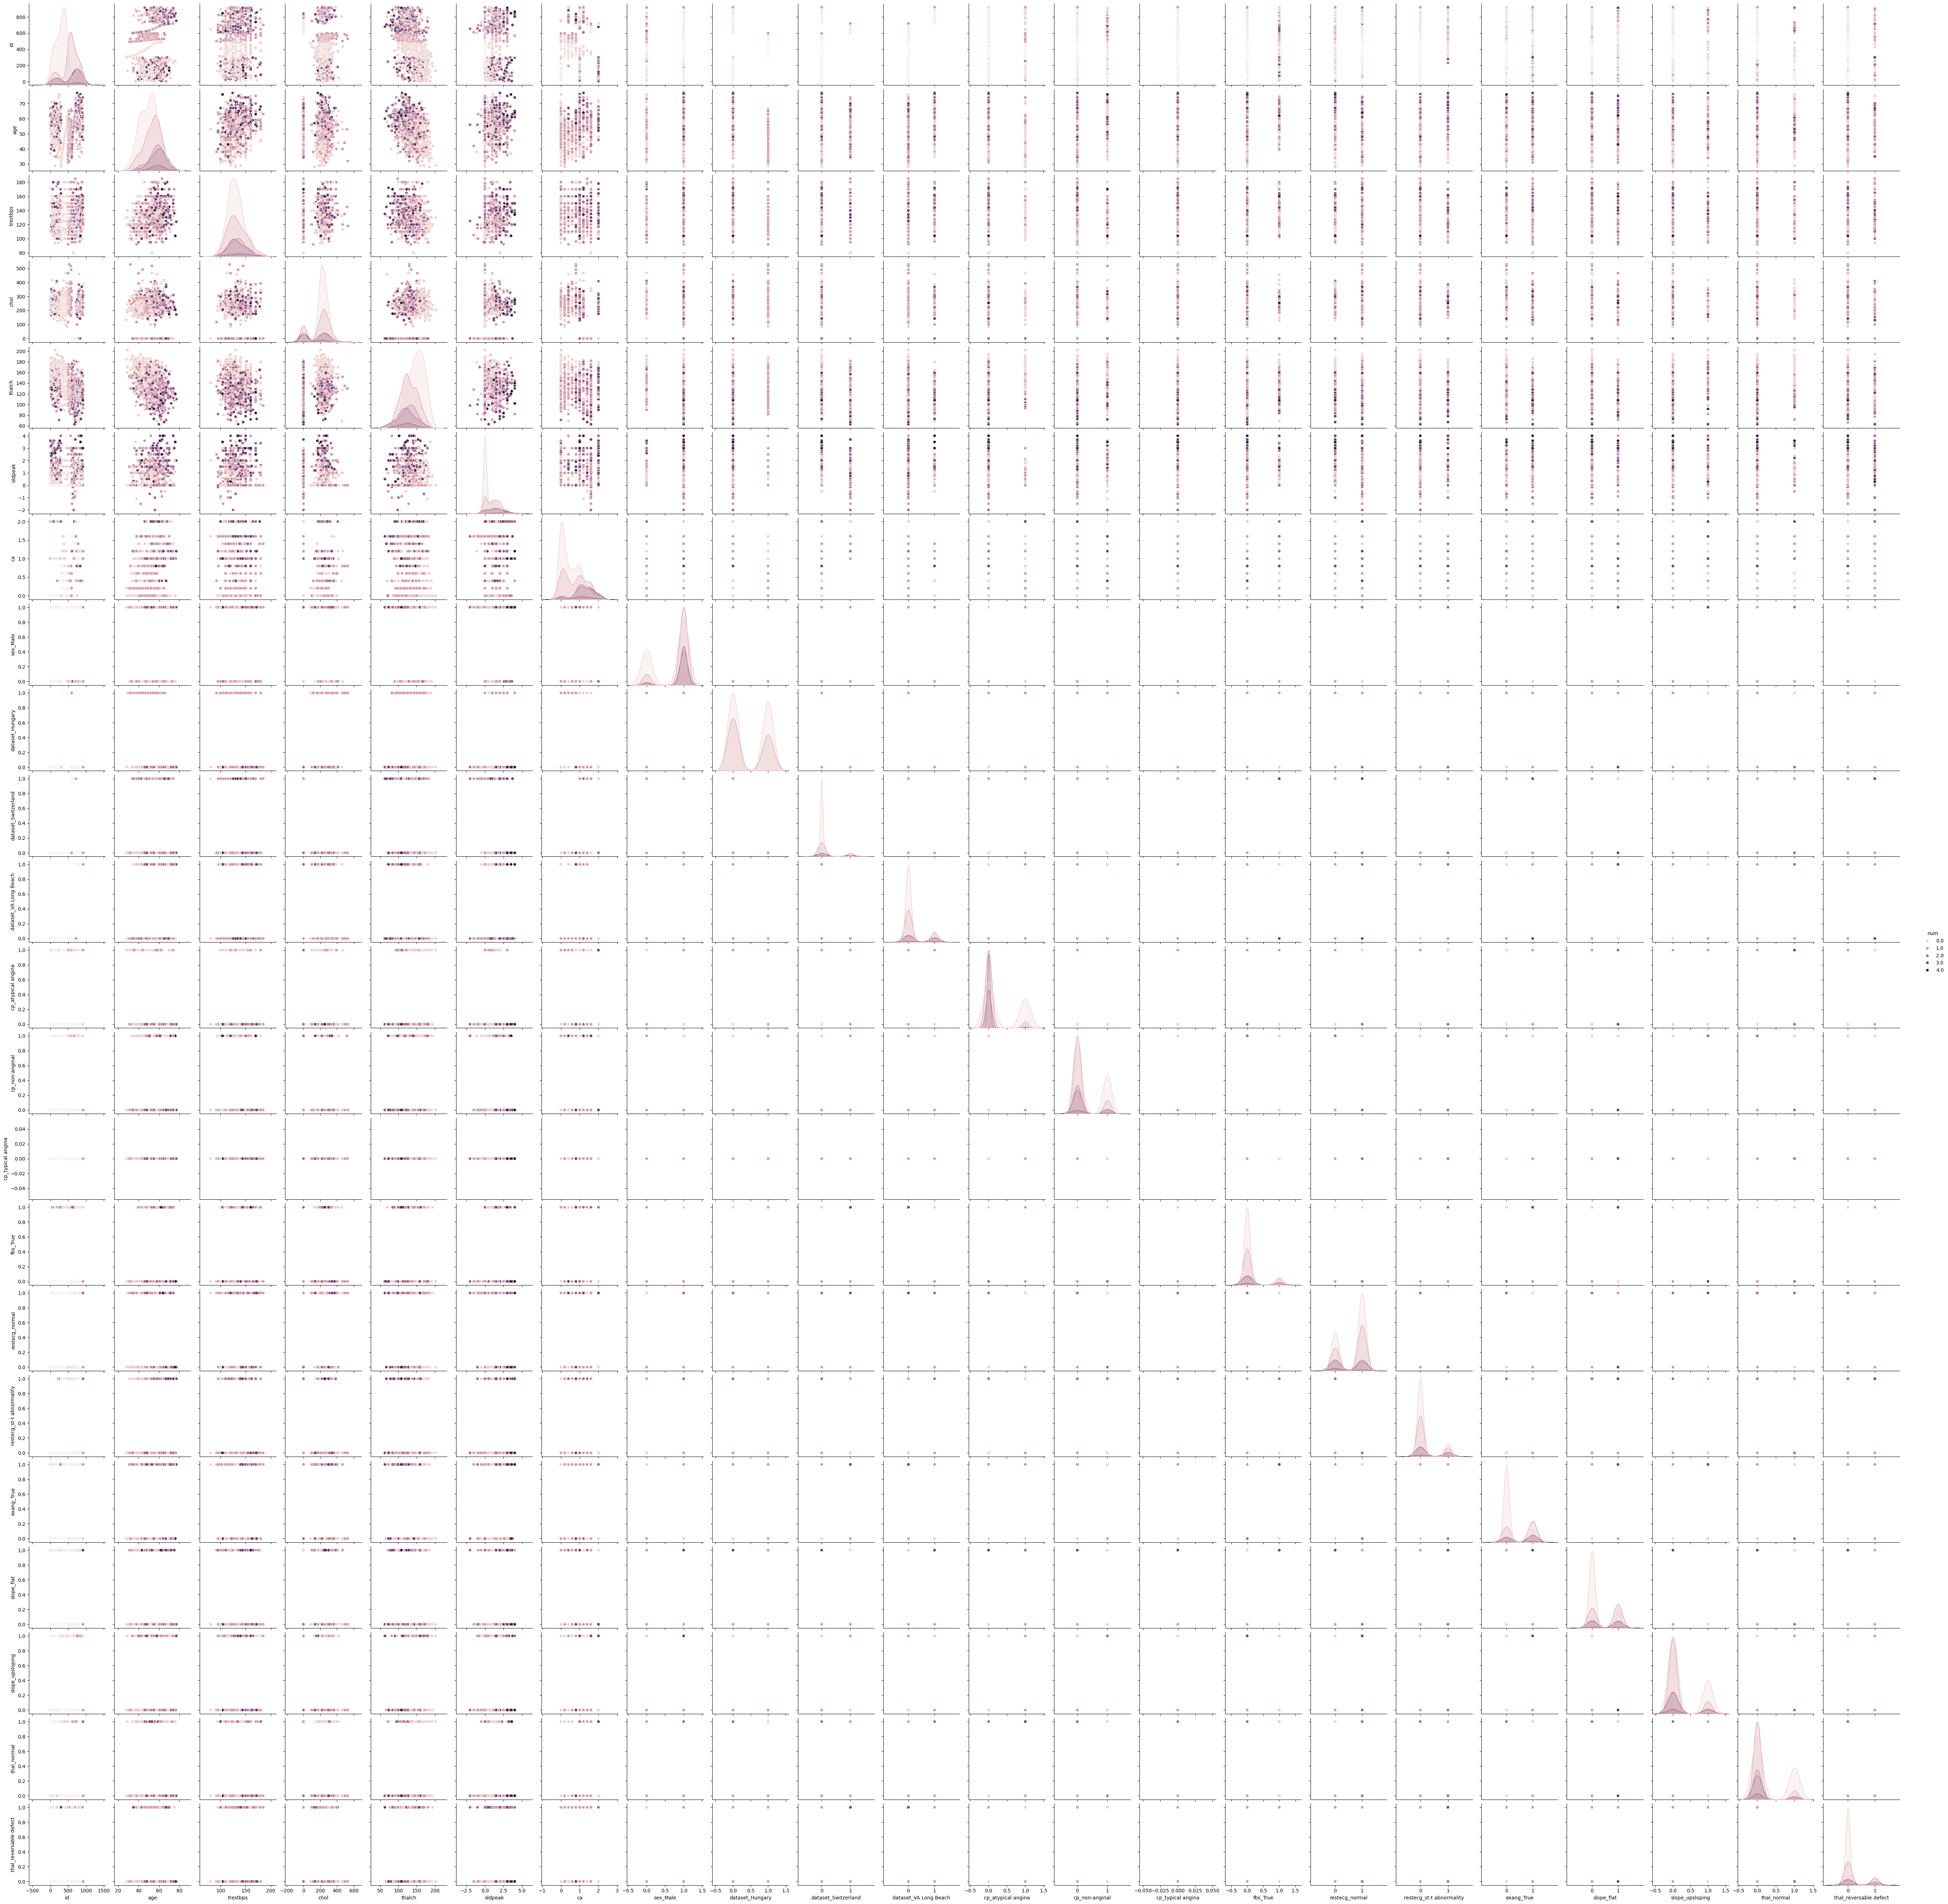

In [ ]:
# Pairplot ile sayısal değişkenlerin dağılımı ve korelasyonları
sns.pairplot(data, hue='num', diag_kind='kde')
plt.show()

In [19]:
# Eksik değerleri doldurma (SimpleImputer kullanarak)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [20]:
# Veriyi ölçekleme (MinMax scaling)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [21]:
# SMOTE ile veri dengesini sağlama
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

In [22]:
# Yeni sınıf dağılımını kontrol etme
print(pd.Series(y_res).value_counts())

num
3.0    308
0.0    308
1.0    308
4.0    308
2.0    308
Name: count, dtype: int64


In [23]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [24]:
# Model oluşturma fonksiyonu
def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [25]:

# Early stopping ve model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [27]:
# Hiperparametreler
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150],
    'optimizer': ['SGD', 'Adam', 'RMSprop'],
    'init': ['glorot_uniform', 'normal', 'uniform']
}


In [28]:
# Hiperparametre arama fonksiyonu
def hyperparameter_search(X_train, y_train, param_grid):
    best_score = 0
    best_params = {}
    for batch_size in param_grid['batch_size']:
        for epochs in param_grid['epochs']:
            for optimizer in param_grid['optimizer']:
                for init in param_grid['init']:
                    model = create_model(optimizer=optimizer, init=init)
                    history = model.fit(X_train, y_train,
                                        validation_split=0.2,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        callbacks=[early_stopping, model_checkpoint],
                                        verbose=0)
                    score = min(history.history['val_loss'])  # val_loss en düşük değeri
                    if score < best_score or best_score == 0:
                        best_score = score
                        best_params = {
                            'batch_size': batch_size,
                            'epochs': epochs,
                            'optimizer': optimizer,
                            'init': init
                        }
                        model.save('best_model.h5')
    return best_score, best_params

In [30]:
# Hiperparametre araması
best_score, best_params = hyperparameter_search(X_train, y_train, param_grid)

# En iyi parametreler ile model eğitimi
print(f'En İyi Skor: {best_score:.4f} kullanarak {best_params}')
best_model = create_model(optimizer=best_params['optimizer'], init=best_params['init'])
best_model.load_weights('best_model.h5')


Epoch 1: val_loss did not improve from -506660.03125

Epoch 2: val_loss did not improve from -506660.03125

Epoch 3: val_loss did not improve from -506660.03125

Epoch 4: val_loss did not improve from -506660.03125

Epoch 5: val_loss did not improve from -506660.03125

Epoch 6: val_loss did not improve from -506660.03125

Epoch 7: val_loss did not improve from -506660.03125

Epoch 8: val_loss did not improve from -506660.03125

Epoch 9: val_loss did not improve from -506660.03125

Epoch 10: val_loss did not improve from -506660.03125

Epoch 11: val_loss did not improve from -506660.03125

Epoch 12: val_loss did not improve from -506660.03125

Epoch 13: val_loss did not improve from -506660.03125

Epoch 14: val_loss did not improve from -506660.03125

Epoch 15: val_loss did not improve from -506660.03125
Epoch 15: early stopping


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss did not improve from -506660.03125

Epoch 2: val_loss did not improve from -506660.03125

Epoch 3: val_loss did not improve from -506660.03125

Epoch 4: val_loss did not improve from -506660.03125

Epoch 5: val_loss did not improve from -506660.03125

Epoch 6: val_loss did not improve from -506660.03125

Epoch 7: val_loss did not improve from -506660.03125

Epoch 8: val_loss did not improve from -506660.03125

Epoch 9: val_loss did not improve from -506660.03125

Epoch 10: val_loss did not improve from -506660.03125

Epoch 11: val_loss did not improve from -506660.03125

Epoch 12: val_loss did not improve from -506660.03125

Epoch 13: val_loss did not improve from -506660.03125

Epoch 14: val_loss did not improve from -506660.03125

Epoch 15: val_loss did not improve from -506660.03125

Epoch 16: val_loss did not improve from -506660.03125

Epoch 17: val_loss did not improve from -506660.03125

Epoch 18: val_loss did not improve from -506660.03125

Epoch 19: val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss did not improve from -506660.03125

Epoch 2: val_loss did not improve from -506660.03125

Epoch 3: val_loss did not improve from -506660.03125

Epoch 4: val_loss did not improve from -506660.03125

Epoch 5: val_loss did not improve from -506660.03125

Epoch 6: val_loss did not improve from -506660.03125

Epoch 7: val_loss did not improve from -506660.03125

Epoch 8: val_loss did not improve from -506660.03125

Epoch 9: val_loss did not improve from -506660.03125

Epoch 10: val_loss did not improve from -506660.03125

Epoch 11: val_loss did not improve from -506660.03125
Epoch 11: early stopping

Epoch 1: val_loss did not improve from -506660.03125

Epoch 2: val_loss did not improve from -506660.03125

Epoch 3: val_loss did not improve from -506660.03125

Epoch 4: val_loss did not improve from -506660.03125

Epoch 5: val_loss did not improve from -506660.03125

Epoch 6: val_loss did not improve from -506660.03125

Epoch 7: val_loss did not improve from -506660.03125



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss did not improve from -506660.03125

Epoch 2: val_loss did not improve from -506660.03125

Epoch 3: val_loss did not improve from -506660.03125

Epoch 4: val_loss did not improve from -506660.03125

Epoch 5: val_loss did not improve from -506660.03125

Epoch 6: val_loss did not improve from -506660.03125

Epoch 7: val_loss did not improve from -506660.03125

Epoch 8: val_loss did not improve from -506660.03125

Epoch 9: val_loss did not improve from -506660.03125

Epoch 10: val_loss did not improve from -506660.03125

Epoch 11: val_loss did not improve from -506660.03125

Epoch 12: val_loss did not improve from -506660.03125

Epoch 13: val_loss did not improve from -506660.03125

Epoch 14: val_loss did not improve from -506660.03125

Epoch 15: val_loss did not improve from -506660.03125

Epoch 16: val_loss did not improve from -506660.03125

Epoch 17: val_loss did not improve from -506660.03125

Epoch 18: val_loss did not improve from -506660.03125

Epoch 19: val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss did not improve from -506660.03125

Epoch 2: val_loss did not improve from -506660.03125

Epoch 3: val_loss did not improve from -506660.03125

Epoch 4: val_loss did not improve from -506660.03125

Epoch 5: val_loss did not improve from -506660.03125

Epoch 6: val_loss did not improve from -506660.03125

Epoch 7: val_loss did not improve from -506660.03125

Epoch 8: val_loss did not improve from -506660.03125

Epoch 9: val_loss did not improve from -506660.03125

Epoch 10: val_loss did not improve from -506660.03125

Epoch 11: val_loss did not improve from -506660.03125

Epoch 12: val_loss did not improve from -506660.03125

Epoch 13: val_loss did not improve from -506660.03125

Epoch 14: val_loss did not improve from -506660.03125

Epoch 15: val_loss did not improve from -506660.03125

Epoch 16: val_loss did not improve from -506660.03125

Epoch 17: val_loss did not improve from -506660.03125

Epoch 18: val_loss did not improve from -506660.03125

Epoch 19: val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss did not improve from -506660.03125

Epoch 2: val_loss did not improve from -506660.03125

Epoch 3: val_loss did not improve from -506660.03125

Epoch 4: val_loss did not improve from -506660.03125

Epoch 5: val_loss did not improve from -506660.03125

Epoch 6: val_loss did not improve from -506660.03125

Epoch 7: val_loss did not improve from -506660.03125

Epoch 8: val_loss did not improve from -506660.03125

Epoch 9: val_loss did not improve from -506660.03125

Epoch 10: val_loss did not improve from -506660.03125

Epoch 11: val_loss did not improve from -506660.03125

Epoch 12: val_loss did not improve from -506660.03125

Epoch 13: val_loss did not improve from -506660.03125

Epoch 14: val_loss did not improve from -506660.03125

Epoch 15: val_loss did not improve from -506660.03125

Epoch 16: val_loss did not improve from -506660.03125

Epoch 17: val_loss did not improve from -506660.03125

Epoch 18: val_loss did not improve from -506660.03125

Epoch 19: val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss did not improve from -506660.03125

Epoch 2: val_loss did not improve from -506660.03125

Epoch 3: val_loss did not improve from -506660.03125

Epoch 4: val_loss did not improve from -506660.03125

Epoch 5: val_loss did not improve from -506660.03125

Epoch 6: val_loss did not improve from -506660.03125

Epoch 7: val_loss did not improve from -506660.03125

Epoch 8: val_loss did not improve from -506660.03125

Epoch 9: val_loss did not improve from -506660.03125

Epoch 10: val_loss did not improve from -506660.03125

Epoch 11: val_loss did not improve from -506660.03125

Epoch 12: val_loss did not improve from -506660.03125

Epoch 13: val_loss did not improve from -506660.03125

Epoch 14: val_loss did not improve from -506660.03125

Epoch 15: val_loss did not improve from -506660.03125

Epoch 16: val_loss did not improve from -506660.03125

Epoch 17: val_loss did not improve from -506660.03125

Epoch 18: val_loss did not improve from -506660.03125

Epoch 19: val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss did not improve from -506660.03125

Epoch 2: val_loss did not improve from -506660.03125

Epoch 3: val_loss did not improve from -506660.03125

Epoch 4: val_loss did not improve from -506660.03125

Epoch 5: val_loss did not improve from -506660.03125

Epoch 6: val_loss did not improve from -506660.03125

Epoch 7: val_loss did not improve from -506660.03125

Epoch 8: val_loss did not improve from -506660.03125

Epoch 9: val_loss did not improve from -506660.03125

Epoch 10: val_loss did not improve from -506660.03125

Epoch 11: val_loss did not improve from -506660.03125

Epoch 12: val_loss did not improve from -506660.03125

Epoch 13: val_loss did not improve from -506660.03125

Epoch 14: val_loss did not improve from -506660.03125

Epoch 15: val_loss did not improve from -506660.03125

Epoch 16: val_loss did not improve from -506660.03125

Epoch 17: val_loss did not improve from -506660.03125

Epoch 18: val_loss did not improve from -506660.03125

Epoch 19: val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Epoch 53: val_loss did not improve from -506660.03125

Epoch 54: val_loss did not improve from -506660.03125

Epoch 55: val_loss did not improve from -506660.03125

Epoch 56: val_loss did not improve from -506660.03125

Epoch 57: val_loss did not improve from -506660.03125

Epoch 58: val_loss did not improve from -506660.03125

Epoch 59: val_loss did not improve from -506660.03125

Epoch 60: val_loss did not improve from -506660.03125

Epoch 61: val_loss did not improve from -506660.03125

Epoch 62: val_loss did not improve from -506660.03125

Epoch 63: val_loss did not improve from -506660.03125

Epoch 64: val_loss did not improve from -506660.03125

Epoch 65: val_loss did not improve from -506660.03125

Epoch 66: val_loss did not improve from -506660.03125

Epoch 67: val_loss did not improve from -506660.03125

Epoch 68: val_loss did not improve from -506660.03125

Epoch 69: val_loss did not improve from -506660.03125

Epoch 70: val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_loss did not improve from -357511136.00000

Epoch 6: val_loss did not improve from -357511136.00000

Epoch 7: val_loss did not improve from -357511136.00000

Epoch 8: val_loss did not improve from -357511136.00000

Epoch 9: val_loss did not improve from -357511136.00000

Epoch 10: val_loss did not improve from -357511136.00000

Epoch 11: val_loss did not improve from -357511136.00000
Epoch 11: early stopping

Epoch 1: val_loss did not improve from -357511136.00000

Epoch 2: val_loss did not improve from -357511136.00000

Epoch 3: val_loss did not improve from -357511136.00000

Epoch 4: val_loss did not improve from -357511136.00000

Epoch 5: val_loss did not improve from -357511136.00000

Epoch 6: val_loss did not improve from -357511136.00000

Epoch 7: val_loss did not improve from -357511136.00000

Epoch 8: val_loss did not improve from -357511136.00000

Epoch 9: val_loss did not improve from -357511136.00000

Epoch 10: val_loss did not improve from -357511136.00000

Ep

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_loss did not improve from -755254336.00000

Epoch 6: val_loss did not improve from -755254336.00000

Epoch 7: val_loss did not improve from -755254336.00000

Epoch 8: val_loss did not improve from -755254336.00000

Epoch 9: val_loss did not improve from -755254336.00000

Epoch 10: val_loss did not improve from -755254336.00000

Epoch 11: val_loss did not improve from -755254336.00000
Epoch 11: early stopping

Epoch 1: val_loss did not improve from -755254336.00000

Epoch 2: val_loss did not improve from -755254336.00000

Epoch 3: val_loss did not improve from -755254336.00000

Epoch 4: val_loss did not improve from -755254336.00000

Epoch 5: val_loss did not improve from -755254336.00000

Epoch 6: val_loss did not improve from -755254336.00000

Epoch 7: val_loss did not improve from -755254336.00000

Epoch 8: val_loss did not improve from -755254336.00000

Epoch 9: val_loss did not improve from -755254336.00000

Epoch 10: val_loss did not improve from -755254336.00000

Ep

In [31]:
history = best_model.fit(X_train, y_train,
                         validation_split=0.2,
                         epochs=best_params['epochs'],
                         batch_size=best_params['batch_size'],
                         callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
8/9 [=========================>....] - ETA: 0s - loss: nan - accuracy: 0.4531 
Epoch 1: val_loss did not improve from -755254336.00000
9/9 [==============================] - 3s 83ms/step - loss: nan - accuracy: 0.4525 - val_loss: nan - val_accuracy: 0.4815
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: nan - accuracy: 0.4375
Epoch 2: val_loss did not improve from -755254336.00000
9/9 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.4525 - val_loss: nan - val_accuracy: 0.4815
Epoch 3/100
7/9 [======================>.......] - ETA: 0s - loss: nan - accuracy: 0.4643
Epoch 3: val_loss did not improve from -755254336.00000
9/9 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.4525 - val_loss: nan - val_accuracy: 0.4815
Epoch 4/100
6/9 [===================>..........] - ETA: 0s - loss: nan - accuracy: 0.4688
Epoch 4: val_loss did not improve from -755254336.00000
9/9 [==============================] - 0s 28ms/st

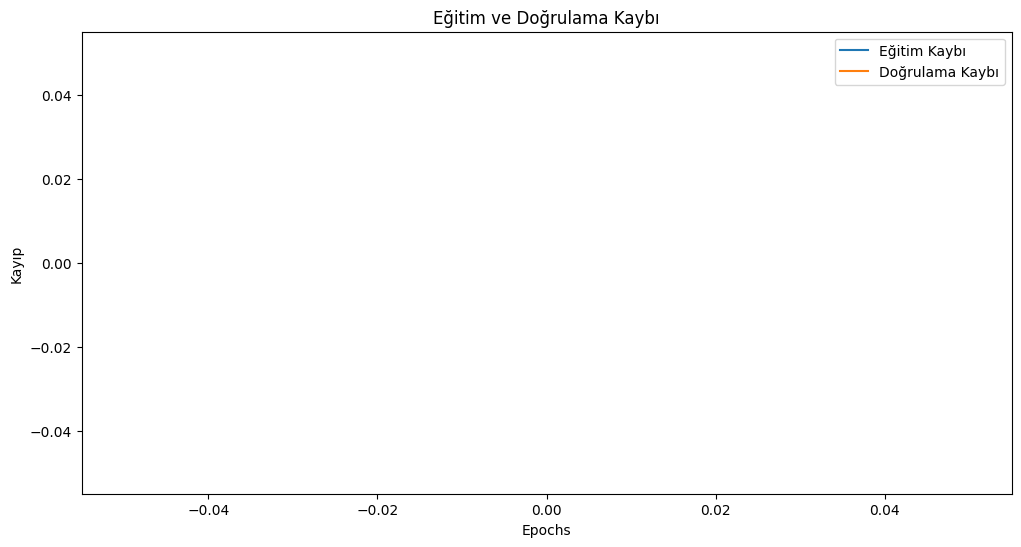

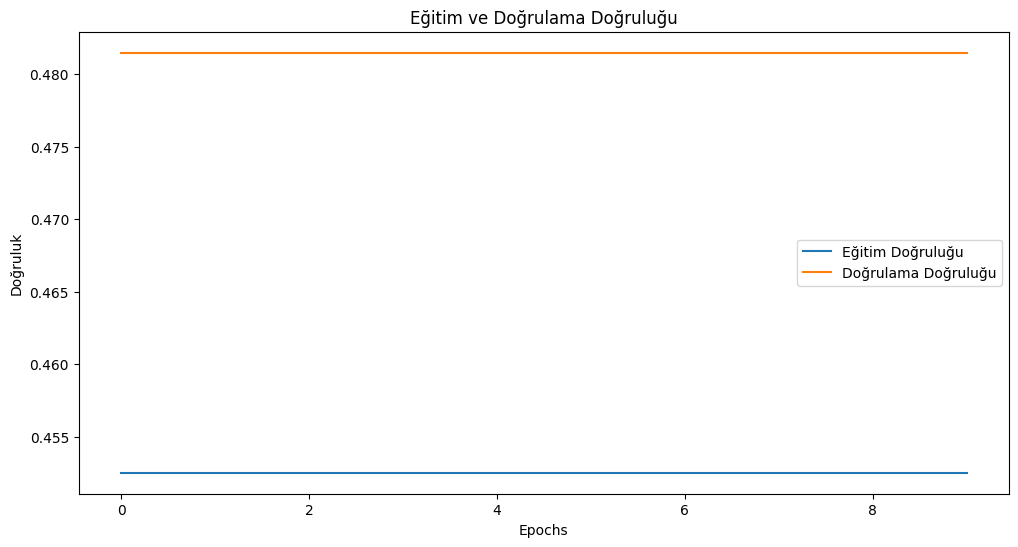

In [32]:

# Eğitim ve doğrulama kayıpları ve doğruluğu grafiği
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


In [33]:
# En iyi modeli yükleme
best_model.load_weights('best_model.h5')

# Test seti üzerinde değerlendirme
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Doğruluk ve diğer metrikler
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

6/6 [==============================] - 0s 4ms/step
Accuracy: 0.4286
Confusion Matrix:
[[72  0  0  0  0]
 [52  0  0  0  0]
 [24  0  0  0  0]
 [16  0  0  0  0]
 [ 4  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      1.00      0.60        72
         1.0       0.00      0.00      0.00        52
         2.0       0.00      0.00      0.00        24
         3.0       0.00      0.00      0.00        16
         4.0       0.00      0.00      0.00         4

    accuracy                           0.43       168
   macro avg       0.09      0.20      0.12       168
weighted avg       0.18      0.43      0.26       168



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


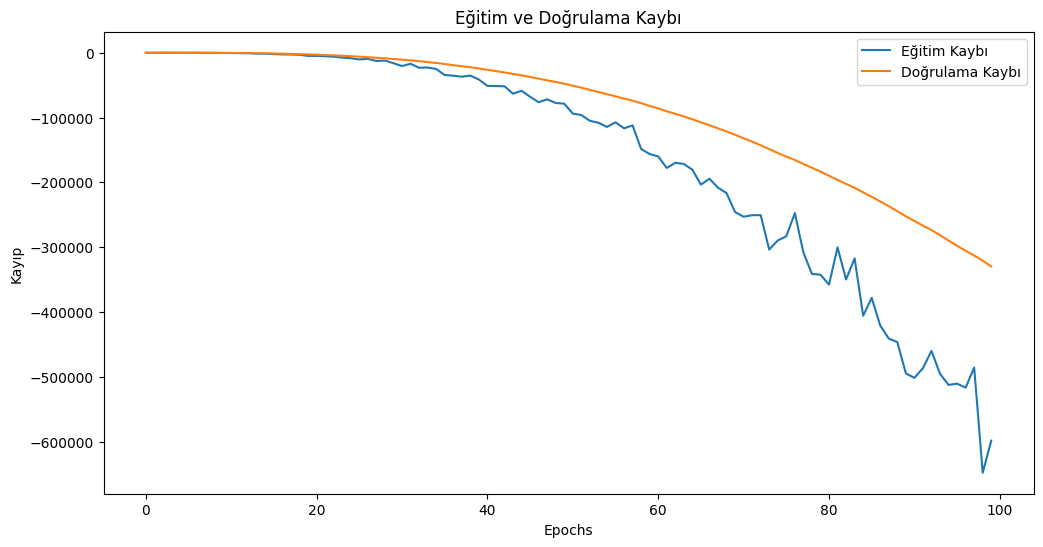

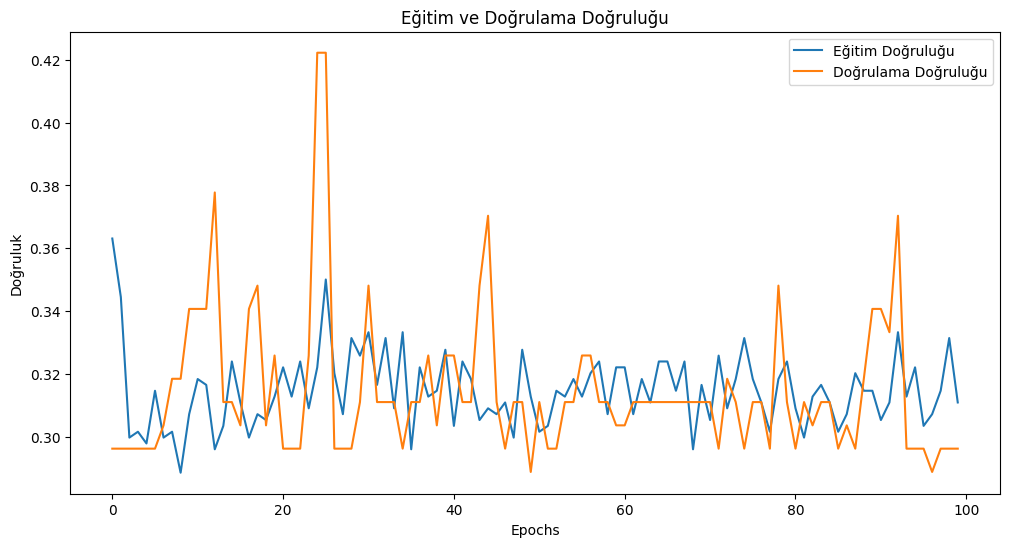

In [36]:

# Eğitim ve doğrulama kayıpları ve doğrulukları grafiği
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()
